In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# Load the dataset
file_path = "../generate_data/label_embeddings.csv"
df = pd.read_csv(file_path)
labels = df['Label'].values
embeddings = df.drop(columns=['Label']).values
print(f"Label: {len(labels)}, embeddings with shape: {embeddings.shape}." )

Label: 854, embeddings with shape: (854, 100).


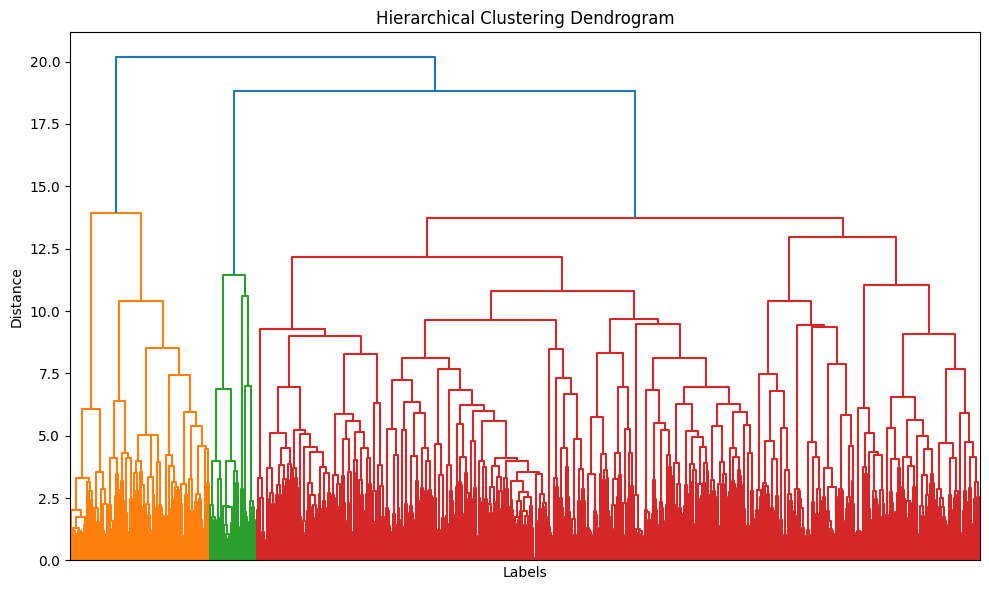

In [4]:
# Perform hierarchical clustering
Z = linkage(embeddings, method='ward')
# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, no_labels=True, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Labels')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [6]:
num_clusters = 3
cluster_labels = fcluster(Z, num_clusters, criterion='maxclust')
# Create a DataFrame to hold the cluster labels
cluster_df = pd.DataFrame({'Label': labels, 'Cluster': cluster_labels})
# Save the cluster labels to a CSV file
output_file_path = "generate_data/label_embeddings_hc.csv"
cluster_df.to_csv(output_file_path, index=False)
print(f"Results saved to {output_file_path}")

Results saved to generate_data/label_embeddings_hc.csv
